In [11]:
#시작 전 설정
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format='retina'
import pandas as pd
import numpy as np
#원하는 한글폰트 지정
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False) #Y축
#경고메세지 안보이게
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
import folium #지도시각화를 위한

In [12]:
data_edu1=pd.read_csv('E:/kim_jiwon/src/Project_02/data/월평균가계지출세부/가구당_월평균_가계지출__전국_1인이상__20210415175830_교육.csv',sep=',',encoding='cp949')
data_edu2=pd.read_csv('E:/kim_jiwon/src/Project_02/data/월평균가계지출세부/가구당_월평균_가계지출__전국_1인이상__20210415175830_교육2.csv',sep=',',encoding='cp949')

In [13]:
#data.rename(index = {'가계지출항목별(1)':'년도'}, inplace = True)
#data_lodge1 정제
data_edu1["가계지출항목별(2)"]=data_edu1["가계지출항목별(2)"].apply(lambda x:str(x.split(" ")[0]))
data_edu1=data_edu1.set_index(data_edu1.loc[:,"가계지출항목별(2)"])
data_edu1=data_edu1.loc[:,"2017":"2018"]
data_edu1=data_edu1.loc["소계":,"2017":"2018"]
data_edu1

,2017,2018
가계지출항목별(2),,
소계,188343,173372
정규교육,72022,61650
초등교육,6428,6394
중등교육,9485,7909
고등교육,56109,47347
학원및보습교육,108725,104437
학생학원교육,101593,98244
성인학원교육,7133,6193
기타교육,7595,7285


In [14]:
data_edu2=data_edu2.set_index(data_edu2.loc[:,"가계수지항목별"],drop=True)

In [43]:
data_edu2=data_edu2.loc[:,"2019":"2020"]
data_edu2.rename(index = {"10.교육":"소계"}, inplace = True)
data_edu2=data_edu2.loc["소계":,"2019":"2020"]


Index(['소계', '정규교육', '초등교육', '중등교육', '고등교육', '학원및보습교육', '학생학원교육', '성인학원교육',
       '기타교육'],
      dtype='object', name='가계수지항목별')

In [44]:
data_edu2.index=data_edu1.index

In [52]:
edu_cases=pd.concat([data_edu1,data_edu2],axis=1,join='inner')
edu_cases


,2017,2018,2019,2020
가계지출항목별(2),,,,
소계,188343,173372,204775,159087
정규교육,72022,61650,57348,45036
초등교육,6428,6394,4795,3785
중등교육,9485,7909,7517,1975
고등교육,56109,47347,45035,39276
학원및보습교육,108725,104437,140580,112042
학생학원교육,101593,98244,128097,102101
성인학원교육,7133,6193,12484,9941
기타교육,7595,7285,6847,2009


In [53]:
edu_cases=edu_cases.reset_index()
edu_cases.rename(columns={'가계지출항목별(2)':"항목"},inplace=True)
edu_cases

,항목,2017,2018,2019,2020
0,소계,188343,173372,204775,159087
1,정규교육,72022,61650,57348,45036
2,초등교육,6428,6394,4795,3785
3,중등교육,9485,7909,7517,1975
4,고등교육,56109,47347,45035,39276
5,학원및보습교육,108725,104437,140580,112042
6,학생학원교육,101593,98244,128097,102101
7,성인학원교육,7133,6193,12484,9941
8,기타교육,7595,7285,6847,2009


In [54]:
edu_cases_melt=edu_cases.melt(id_vars=["항목"],var_name="년도",value_name="가계지수")
edu_cases_melt


,항목,년도,가계지수
0,소계,2017,188343
1,정규교육,2017,72022
2,초등교육,2017,6428
3,중등교육,2017,9485
4,고등교육,2017,56109
5,학원및보습교육,2017,108725
6,학생학원교육,2017,101593
7,성인학원교육,2017,7133
8,기타교육,2017,7595
9,소계,2018,173372


In [55]:
edu_cases_melt[['가계지수']] = edu_cases_melt[['가계지수']].astype(int)
edu_cases_melt.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   항목      36 non-null     object
 1   년도      36 non-null     object
 2   가계지수    36 non-null     int32 
dtypes: int32(1), object(2)
memory usage: 848.0+ bytes


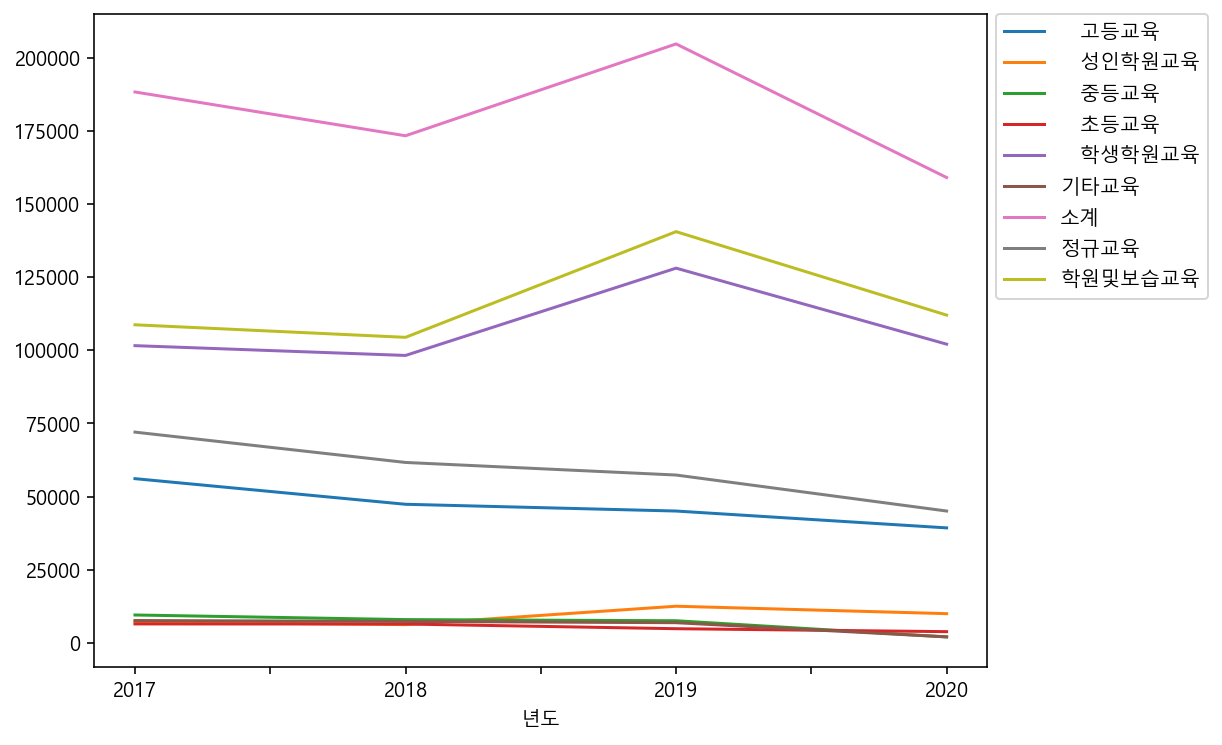

In [57]:
edu_cases_melt.pivot_table(index='년도',columns='항목',values='가계지수').plot(figsize=(8,6))
plt.legend(bbox_to_anchor=(1.01,1),loc=0,borderaxespad=0)
plt.savefig('E:/kim_jiwon/src/project_02/img/가구당 월평균 가계지수 변화_교육.png')